# Introduction to the Frequency Domain and Fourier Analysis

Audio signals such as music are easily thought of as the combination of sounds at different pitches. We generalize this to the idea of representing signals in the *frequency domain*, meaning as a sum of sinusoids of different frequencies. 

Functions of different categories, i.e. continuous periodic functions, discrete finite support functions, etc. all require slightly different tools for frequency domain analysis. We'll get to the details of all these tools eventually, but for now we'll state facts about the simplest of these tools without proof, and use these facts to build a working analogy.

## Fourier Series

Given a sufficiently "nice" periodic function $s(t)$ with period $P$, there are real-valued sequences $\{A_n\}$ and $\{B_n\}$ such that the function series $\{s_N(t)\}$ defined by

$$ s_N(t) = A_0 + \sum_{n=1}^N \left(A_n \cos\left(\frac{2 \pi n}{P} t \right) + B_n \sin \left(\frac{2 \pi n}{P} t \right) \right)$$

converges to $s(t)$. We call $\{s_N(t)\}$ the *Fourier series* of $s(t)$ and we call $\{A_n\}$ and $\{B_n\}$ the *Fourier coefficicents*. Alternatively, we can use the complex exponential representation

$$ s_N(t) = \sum_{n=-N}^N C_n e^{\frac{2 \pi j n}{P} t}$$

where the $\{C_n\}$ Fourier coefficients are complex-valued.

Note that convergence is a tricky thing, and there are multiple notions of convergence that lead to different "niceness" conditions. See [Wikipedia](https://en.wikipedia.org/wiki/Convergence_of_Fourier_series) for details.

## Discrete Fourier Transform and Fast Fourier Transform

Skipping over all the details for now, we can generalize the idea of Fourier series to lots of different categories of functions. In the case where we have a finite length, discretely sampled time-domain signal and we want to produce a finite length, discretely sampled frequency-domain representation, we use the [Discrete Fourier Transform (DFT)](https://en.wikipedia.org/wiki/Discrete_Fourier_transform). There are multiple algorithms for computing the DFT coefficients, but we almost always use the [Fast Fourier Transform (FFT)](https://en.wikipedia.org/wiki/Fast_Fourier_transform), which is implemented in `numpy` and `scipy`.

Let's evaluate the FFT of a simple sinusoid.

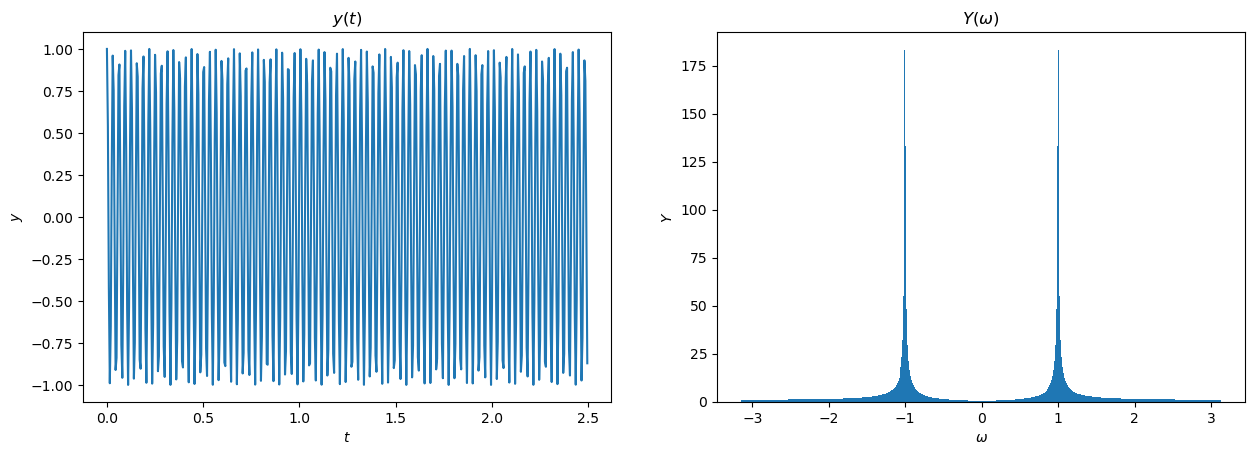

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fs = 200  # sampling rate
N = 500  # number of samples
w_0 = 1  # angular frequency of the sinusoid to generate

t = np.arange(N) / float(fs)
y = np.cos(w_0 * fs * t)

freq = np.fft.fftfreq(t.shape[-1])
omega = 2 * np.pi * freq
Y = np.fft.fft(y)

plt.figure().set_figwidth(15)

plt.subplot(1, 2, 1)
plt.plot(t, y)
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.title("$y(t)$")

plt.subplot(1, 2, 2)
plt.bar(omega, np.abs(Y), width=2 * np.pi / N)
plt.xlabel("$\omega$")
plt.ylabel("$Y$")
plt.title("$Y(\omega)$")

plt.show()

Here we can see that a pure sinusoid in the time domain results in two peaks in the frequency domain corresponding to $\pm \omega_0$. We get both the positive and negative peaks because $\cos$ is an even function, i.e. for a real-valued signal, $\cos(\omega_0 t) = \cos(-\omega_0 t)$.

## Spectral Leakage and Windowing

Aside from the two peaks, the remaining FFT bins quickly drop to zero, but are not exactly equal to zero. If we were computing the Fourier series of $\cos\left( \frac{2 \pi k}{P} t \right) $ for some integer $k$, we'd expect $A_k$ to be positive and all other Fourier coefficients to be zero. The fact that our FFT isn't just two Dirac impulses at $\pm \omega_0$ is an artifact of the

 1. Finite sampling of the signal (multiplying $\cos(\omega_0 t)$ with a [Dirac comb](https://en.wikipedia.org/wiki/Dirac_comb))
 2. Finite suppport of the sampled signal (jumping from constant on $(-\infty, 0)$ to a sinusoid on $[0, 2.5]$ and back to a constant on $(2.5, \infty)$)

We call this effect [spectral leakage](https://en.wikipedia.org/wiki/Spectral_leakage). In order to mitigate the effects of (2), we usually multiply by a [window function](https://en.wikipedia.org/wiki/Window_function) to smoothly transition into our sampled function's support.

Here we can see that masking $y$ with a window function before computing the FFT dramatically reduces spectral leakage.

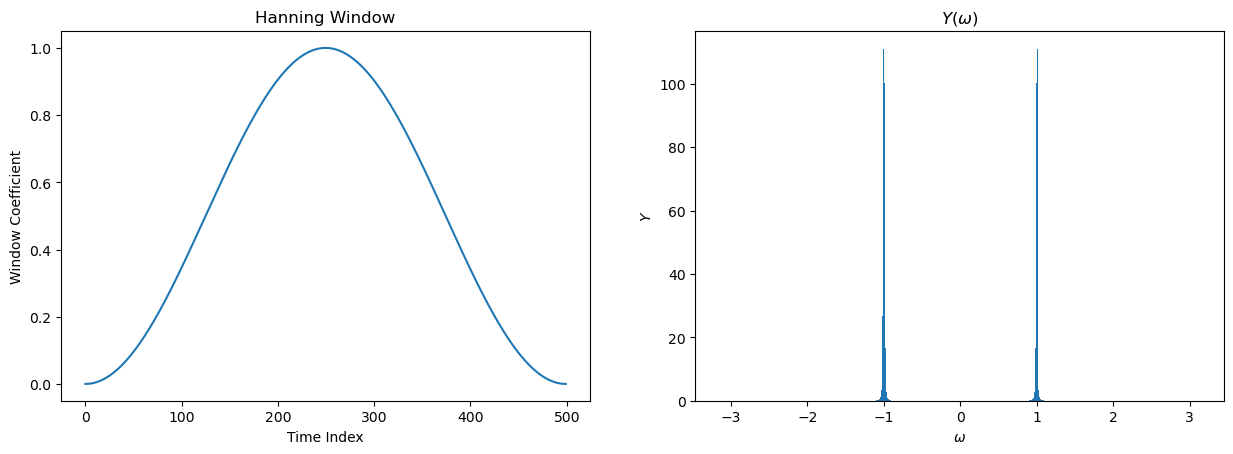

In [2]:
win = np.hanning(len(y))
Y = np.fft.fft(win * y)

plt.figure().set_figwidth(15)

plt.subplot(1, 2, 1)
plt.plot(win)
plt.xlabel("Time Index")
plt.ylabel("Window Coefficient")
plt.title("Hanning Window")

plt.subplot(1, 2, 2)
plt.bar(omega, np.abs(Y), width=2 * np.pi / N)
plt.xlabel("$\omega$")
plt.ylabel("$Y$")
plt.title("$Y(\omega)$")

plt.show()

## Linearity of the Fourier Transform

All variations of the Fourier transforms, including the DFT, are linear, i.e.

$$\mathcal{F} \left \{ a x(t) + b y(t) \right \} = a  \mathcal{F} \{ x(t) \} + b \mathcal{F} \{ y(t) \}$$

To see this, let's take the FFT of the sum of a few sinusoids.

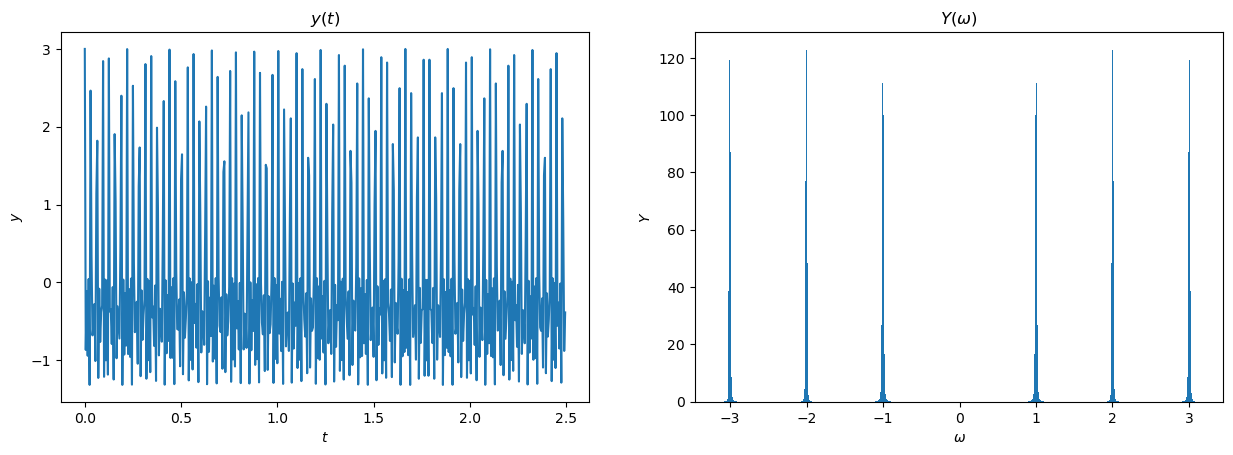

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fs = 200  # sampling rate
N = 500  # number of samples
w_0 = 1  # angular frequency of the first sinusoid to generate

t = np.arange(N) / float(fs)
y = np.cos(w_0 * fs * t) + np.cos(2 * w_0 * fs * t) + np.cos(3 * w_0 * fs * t)

freq = np.fft.fftfreq(t.shape[-1])
omega = 2 * np.pi * freq
win = np.hanning(len(y))
Y = np.fft.fft(win * y)

plt.figure().set_figwidth(15)

plt.subplot(1, 2, 1)
plt.plot(t, y)
plt.xlabel("$t$")
plt.ylabel("$y$")
plt.title("$y(t)$")

plt.subplot(1, 2, 2)
plt.bar(omega, np.abs(Y), width=2 * np.pi / N)
plt.xlabel("$\omega$")
plt.ylabel("$Y$")
plt.title("$Y(\omega)$")

plt.show()

# Exercises

1. Consider the function $s(t)$ with the following complex Fourier series coefficients: $C_0 = \frac{1}{2}$, $C_k = -\frac{1}{\pi k} \, \forall k \neq 0$.
  - Try to use your intuition to imagine how $s(t)$ will look. Think about this for a few minutes before moving on to the next step.
  - Plot the Fourier series $s_N(t)$ for various $N$ using `numpy` and `matplotlib`.
  - What does $s(t)$ (i.e. $s_\infty(t)$) look like?

2. Consider the set of functions whose Fourier series converges (let's say pointwise)
  - Prove that this set is a vector space, i.e. if $f(t)$ and $g(t)$ are in this set, $a f(t) + b g(t)$ is also in this set $\forall a, b \in \R$.
  - Prove that the map from these functions to their Fourier coefficients is linear.
  - Hint: For now we'll treat convergence informally and say things like $f(t) = \sum_{n=-\infty}^\infty C_n e^{\frac{2 \pi j n}{P} t}$ without worrying about the infinite sum.